In [1]:
import pandas as pd
import re
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report as cr

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ineuron practice/practice/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Downloading Stop Words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

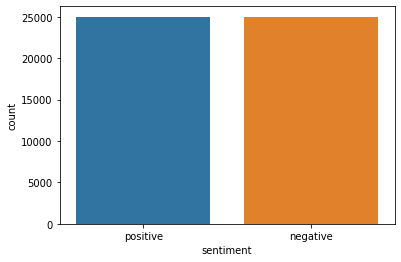

In [4]:
sns.countplot(x='sentiment',data=df)

In [5]:
ps = PorterStemmer()

In [6]:
corpus = []
for i in range(0,len(df)):
    review = re.sub('[^a-zA-Z]',' ',df['review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [7]:

# Creating a bag of words model
cv = CountVectorizer(max_features=2500)
x = cv.fit_transform(corpus).toarray()

In [8]:
y = pd.get_dummies(df['sentiment'])
y = y.iloc[:,1].values

In [9]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=121)

In [10]:
#Navie Bayes
NB_model = MultinomialNB()
NB_model.fit(X_train,y_train)

MultinomialNB()

In [11]:
# prediction
y_pred = NB_model.predict(X_test)

In [12]:
score = accuracy_score(y_test,y_pred)
print(score)
print(cr(y_test,y_pred))

0.8511
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      5024
           1       0.85      0.86      0.85      4976

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [13]:
#Random Forest Classifier
rf_classifer = RandomForestClassifier()
rf_classifer.fit(X_train,y_train)

RandomForestClassifier()

In [14]:
y_pred2 = rf_classifer.predict(X_test)

In [15]:
score = accuracy_score(y_test,y_pred2)
print(score)
print(cr(y_test,y_pred2))

0.8503
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      5024
           1       0.85      0.84      0.85      4976

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [16]:
# Using lemmatization

In [19]:
lemmatizer=WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [20]:
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['review'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [21]:

cv = CountVectorizer(max_features=2500)
x = cv.fit_transform(corpus).toarray()

In [22]:
y = pd.get_dummies(df['sentiment'])
y = y.iloc[:,1].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=121)

In [24]:
#Navie Bayes
NB_model = MultinomialNB()
NB_model.fit(X_train,y_train)

MultinomialNB()

In [26]:
# prediction
y_pred = NB_model.predict(X_test)

In [27]:
score = accuracy_score(y_test,y_pred)
print(score)
print(cr(y_test,y_pred))

0.8534
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      5024
           1       0.85      0.86      0.85      4976

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [28]:
#Random Forest Classifier
rf_classifer = RandomForestClassifier()
rf_classifer.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
y_pred2 = rf_classifer.predict(X_test)

In [30]:
score = accuracy_score(y_test,y_pred2)
print(score)
print(cr(y_test,y_pred2))

0.8464
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      5024
           1       0.84      0.85      0.85      4976

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [31]:
# Using TFIDF model

In [32]:
# Creating a TFIDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500)
X = tv.fit_transform(corpus).toarray()

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 121)

In [34]:
#Navie Bayes
NB_model = MultinomialNB()
NB_model.fit(X_train,y_train)

MultinomialNB()

In [35]:
# prediction
y_pred = NB_model.predict(X_test)

In [36]:
score = accuracy_score(y_test,y_pred)
print(score)
print(cr(y_test,y_pred))

0.86
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      5024
           1       0.85      0.88      0.86      4976

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [37]:
#Random Forest Classifier
rf_classifer = RandomForestClassifier()
rf_classifer.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
y_pred2 = rf_classifer.predict(X_test)

In [39]:
score = accuracy_score(y_test,y_pred2)
print(score)
print(cr(y_test,y_pred2))

0.8497
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      5024
           1       0.85      0.84      0.85      4976

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

